In [1]:
import numpy as np

from auxiliary.Model import Model
from auxiliary.Sample import Sample
from auxiliary.tauchen import approx_markov
from auxiliary.estimation_func import *
from auxiliary.helpers_calcmoments import *
from auxiliary.helpers_plotting import *
from auxiliary.helpers_general import *

import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv

In [2]:
seed = 10082021
np.random.seed(seed)

alpha = 0.5190
delta = 0.0437
alpha_plusminus = 0.15
delta_plusminus = 0.02

deep_param = {
    "beta" : 0.96,
    "gamma": 0.05, # prev 0.05
    "rho" : 0.75,
    "sigma" : 0.3, # prev 0.15
}

discretization_param = {
    "size_shock_grid" : 11, 
    "range_shock_grid" : 2.575
}

approx_param = {
    "max_iter" : 1000, 
    "precision" : 1e-4, # 1e-5
    "size_capital_grid" : 101, 
}

sim_param = {
    "number_firms" : 1000, 
    "number_simulations_per_firm" : 1, 
    "number_years_per_firm" : 10, # prev 30
    "burnin" : 200,
    "seed" : 10,
    "bounds_optimizer": [[0.001,1], [0.001, 0.3]],
}

visualization_param = {
    "alpha grid bounds" : (alpha - alpha_plusminus, alpha + alpha_plusminus), 
    "delta grid bounds" : (delta - delta_plusminus, delta + delta_plusminus),
    "fixed alpha" : alpha, 
    "fixed delta" : delta, 
    "parameter grid size" : 20
}

mom_param = {
    "no_moments" : 3, 
    "no_param" : 2,
}

In [3]:
model = Model(deep_param, discretization_param, approx_param)
sample = Sample(mom_param)

Empirical covariance matrix not invertible. Use identity as weight matrix instead.


In [ ]:
# final, sim_mom = get_estimation_results(sample=sample, model=model, sim_param=sim_param) 
# alpha = final[0]
# delta = final[1]

# visualize_model_fit(sample, model, alpha, delta, sim_param)

25 ( 0.0036357885011000235  error)


Converged in 36  iterations with error  9.096856160795141e-05


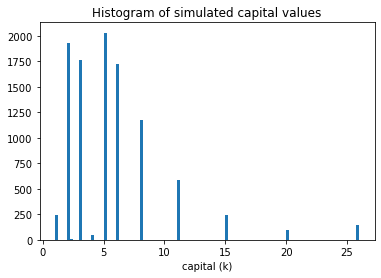

In [4]:
sim = model._simulate_model(alpha, delta, sim_param)

# tmp = sim[:,6].copy()
# print(tmp [tmp < 0 ])
fig,ax = plt.subplots()
ax.hist(sim[:,6], bins=100)
ax.set_xlabel("capital (k)")
ax.set_title("Histogram of simulated capital values")
plt.show()

25 ( 0.0010504255716128341  error)


Converged in 33  iterations with error  7.18559386001516e-05
25 ( 0.0011585858350287026  error)


Converged in 33  iterations with error  7.925477130754643e-05
25 ( 0.0012845917440102994  error)


Converged in 33  iterations with error  8.787421042200094e-05
25 ( 0.0014336765660303286  error)


Converged in 33  iterations with error  9.807283977636416e-05
25 ( 0.0016130526866007244  error)


Converged in 34  iterations with error  7.891196722198401e-05
25 ( 0.001831741043744728  error)


Converged in 34  iterations with error  8.961001910989808e-05
25 ( 0.0020943539681610446  error)


Converged in 35  iterations with error  7.327230731846157e-05
25 ( 0.002421382322467025  error)


Converged in 35  iterations with error  8.47151962375392e-05
25 ( 0.0028273851382039084  error)


Converged in 35  iterations with error  9.891982142562483e-05
25 ( 0.003333543753825552  error)


Converged in 36  iterations with error  8.340766125058963e-05
25 ( 0.00398576

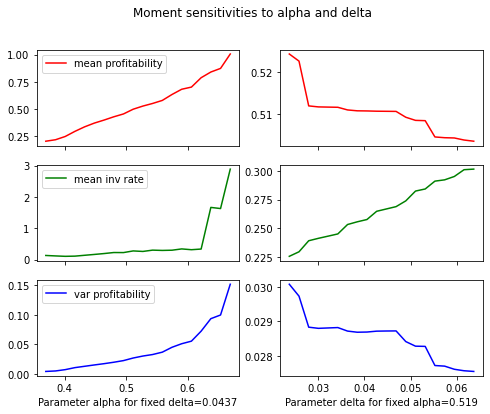

In [5]:
model._solve_model(alpha, delta, approx_param)

# print(model.shock_grid)

# sim = model._simulate_model(alpha, delta, sim_param)
# df = pd.DataFrame(sim)
# df.rename(columns={list(df)[2]: 'profit'}, inplace=True)
# print(df.head(50))

# fig,ax = plt.subplots(figsize=(15,5))
# ax = plt.scatter(x=df.index, y="profit", data=df)
# plt.grid()
# plt.show()



# model.visualize_model_sol(alpha, delta, approx_param)
model.visualize_mom_sensitivity(visualization_param, sim_param)

# est, sim_mom = get_estimation_results(model, sim_param)
# print(f'{est=}')
# print(f'{sim_mom=}')

# test1, test2 = get_estimation_results(sample, model, sim_param)
# print(f'{test1=}')
# print(f'{test2=}')